<a href="https://colab.research.google.com/github/MonoaraAkter/ML-Lab/blob/main/wine_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [5]:
file_path = 'wine_food_pairings.csv'  # Default path in Colab after upload
df = pd.read_csv(file_path)

In [ ]:
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        34933 non-null  object
 1   wine_category    34933 non-null  object
 2   food_item        34933 non-null  object
 3   food_category    34933 non-null  object
 4   cuisine          34933 non-null  object
 5   pairing_quality  34933 non-null  int64 
 6   quality_label    34933 non-null  object
 7   description      34933 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB

First 5 rows:
            wine_type wine_category          food_item food_category  \
0        Syrah/Shiraz           Red     smoked sausage     Smoky BBQ   
1            Grenache           Red  charcuterie board   Salty Snack   
2             Madeira     Fortified         lemon tart       Dessert   
3  Cabernet Sauvignon           Red         roast lamb      Red Meat   
4  

In [ ]:
df = df.dropna()

In [ ]:
df['pairing_quality'] = pd.to_numeric(df['pairing_quality'], errors='coerce')

In [ ]:
avg_quality_by_wine_cat = df.groupby('wine_category')['pairing_quality'].mean().reset_index().sort_values('pairing_quality', ascending=False)

In [ ]:
avg_quality_by_food_cat = df.groupby('food_category')['pairing_quality'].mean().reset_index().sort_values('pairing_quality', ascending=False)

In [ ]:
pairings_by_cuisine = df['cuisine'].value_counts().reset_index()
pairings_by_cuisine.columns = ['cuisine', 'count']

In [ ]:
# Top wine types by average quality
top_wines = df.groupby('wine_type')['pairing_quality'].mean().reset_index().sort_values('pairing_quality', ascending=False).head(10)

In [ ]:
# Print summaries
print("\nAverage Pairing Quality by Wine Category:")
print(avg_quality_by_wine_cat)
print("\nAverage Pairing Quality by Food Category:")
print(avg_quality_by_food_cat)
print("\nPairings Count by Cuisine:")
print(pairings_by_cuisine)
print("\nTop 10 Wine Types by Average Pairing Quality:")
print(top_wines)


Average Pairing Quality by Wine Category:
  wine_category  pairing_quality
4     Sparkling         3.051053
2           Red         3.047722
0       Dessert         3.002855
5         White         2.994193
1     Fortified         2.962928
3          Rosé         2.937362

Average Pairing Quality by Food Category:
   food_category  pairing_quality
0         Acidic         3.235841
4           Pork         3.049768
8        Seafood         3.041667
5        Poultry         3.026316
10         Spicy         3.000000
9      Smoky BBQ         3.000000
11    Vegetarian         3.000000
7    Salty Snack         3.000000
1         Cheese         2.996264
3        Dessert         2.988614
6       Red Meat         2.906614
2         Creamy         2.861230

Pairings Count by Cuisine:
              cuisine  count
0             Mexican   2089
1      Middle Eastern   2075
2                Thai   2071
3   Chinese (Sichuan)   2068
4            Moroccan   2068
5          Vietnamese   2065
6         

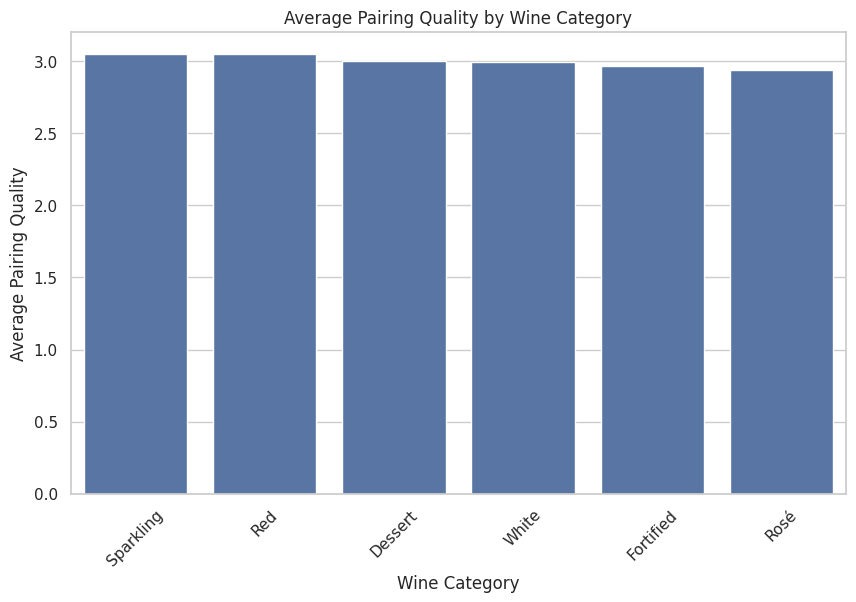

In [ ]:
# Plot 1: Bar plot of Average Pairing Quality by Wine Category
plt.figure(figsize=(10, 6))
sns.barplot(x='wine_category', y='pairing_quality', data=avg_quality_by_wine_cat)
plt.title('Average Pairing Quality by Wine Category')
plt.xlabel('Wine Category')
plt.ylabel('Average Pairing Quality')
plt.xticks(rotation=45)
plt.show()

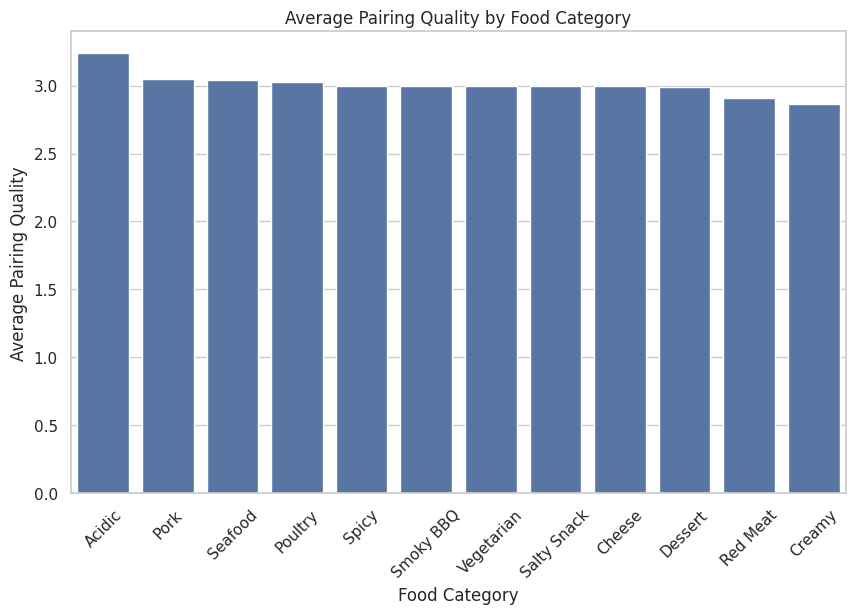

In [ ]:
# Plot 2: Bar plot of Average Pairing Quality by Food Category
plt.figure(figsize=(10, 6))
sns.barplot(x='food_category', y='pairing_quality', data=avg_quality_by_food_cat)
plt.title('Average Pairing Quality by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Average Pairing Quality')
plt.xticks(rotation=45)
plt.show()

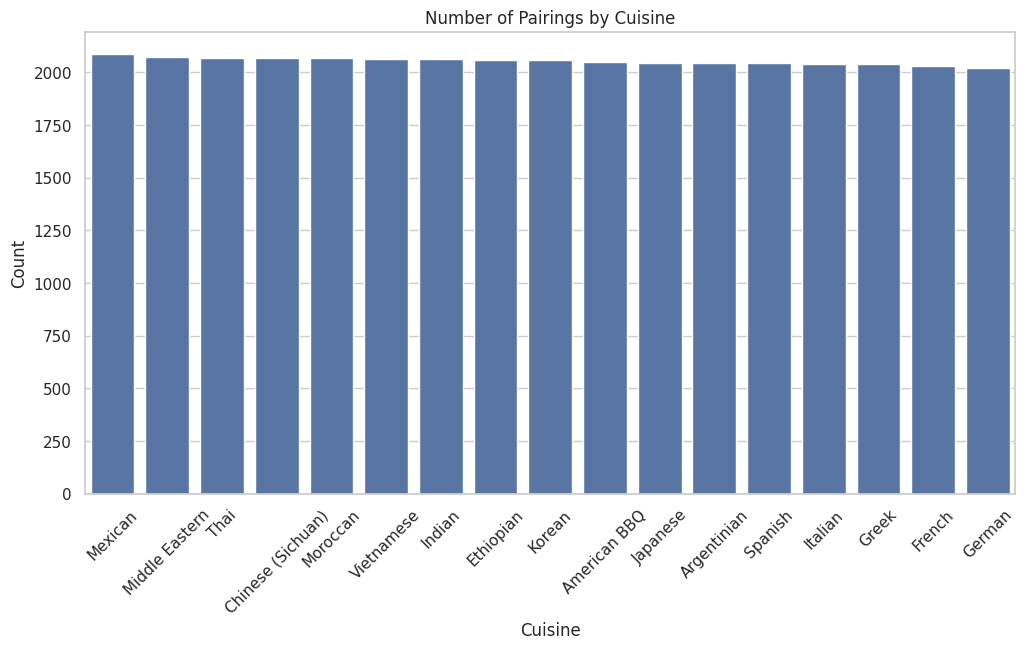

In [ ]:
# Plot 3: Bar plot of Pairings Count by Cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine', y='count', data=pairings_by_cuisine)
plt.title('Number of Pairings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

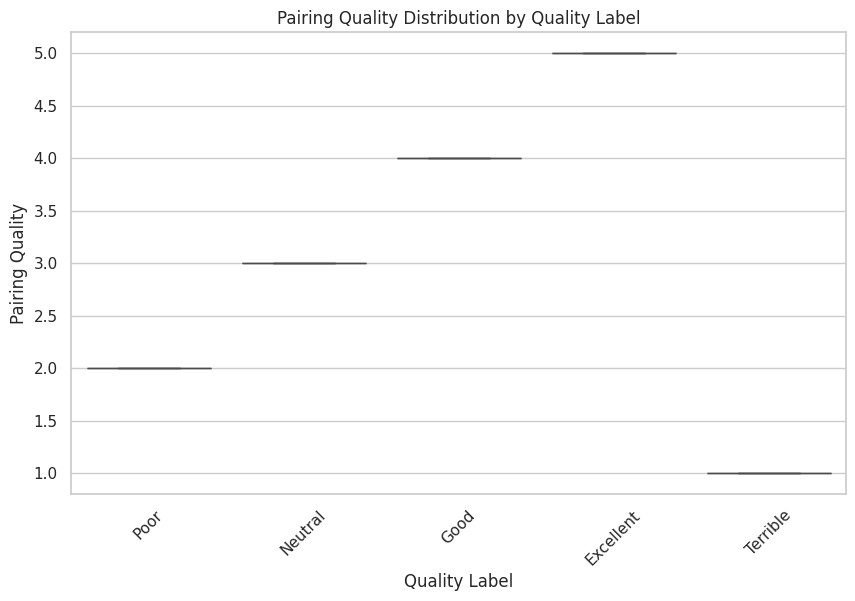

In [ ]:
# Plot 4: Box plot of Pairing Quality by Quality Label
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality_label', y='pairing_quality', data=df)
plt.title('Pairing Quality Distribution by Quality Label')
plt.xlabel('Quality Label')
plt.ylabel('Pairing Quality')
plt.xticks(rotation=45)
plt.show()

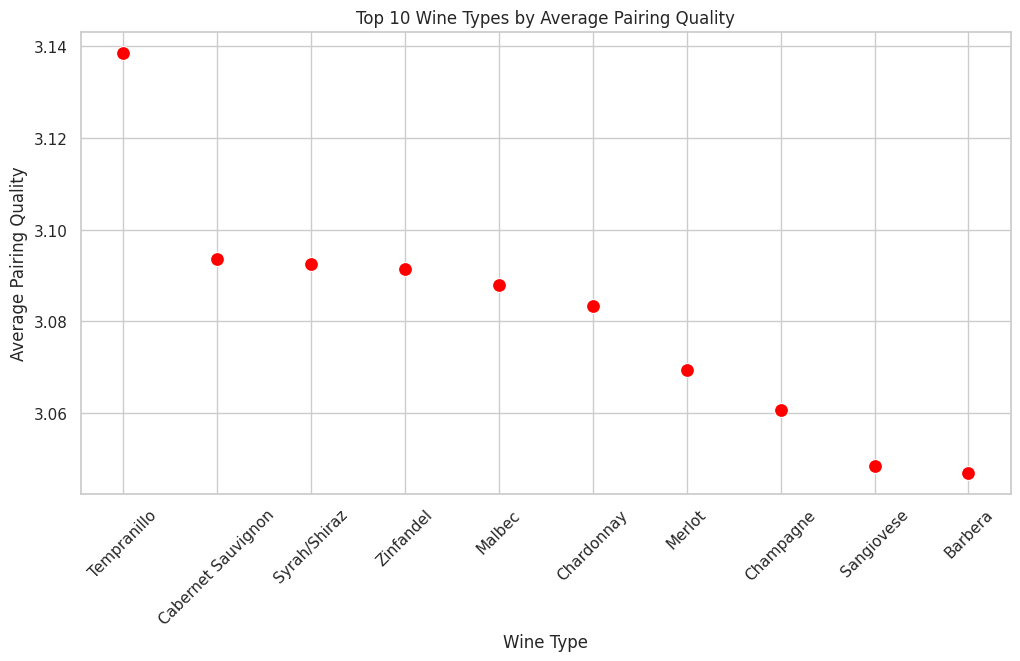

In [ ]:
# Plot 5: Scatter plot of Pairing Quality vs Wine Type (Top 10)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='wine_type', y='pairing_quality', data=top_wines, s=100, color='red')
plt.title('Top 10 Wine Types by Average Pairing Quality')
plt.xlabel('Wine Type')
plt.ylabel('Average Pairing Quality')
plt.xticks(rotation=45)
plt.show()

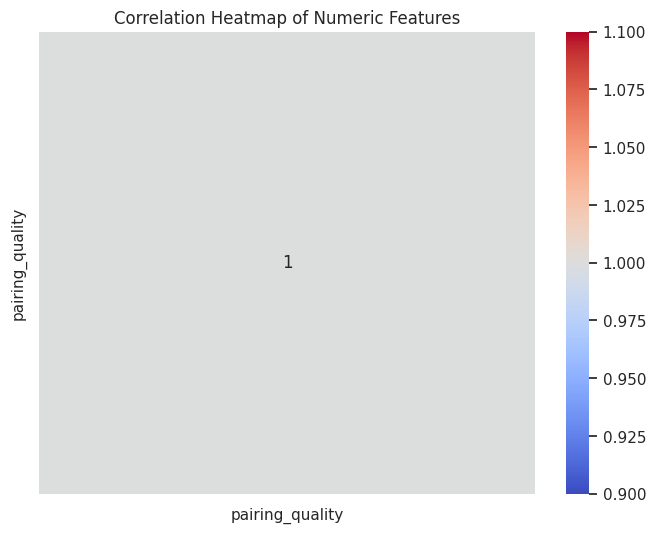

In [ ]:
#Additional: Correlation heatmap (select numeric columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
if not numeric_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")